In [1]:
import itertools
import sys, os

import numpy as np
import pandas as pd
from scipy.special import comb
from scipy import stats
import scipy.cluster.hierarchy as hac
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm

sns.set(rc={'figure.figsize':(15,8)})
sns.set_context('poster')
sns.set_style('white')
#plt.rcParams["figure.dpi"] = 600
from sklearn.model_selection import train_test_split

In [2]:

HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

ccnpalette = [PCOLOR, HCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
ccnorder = ['Bp', 'Bh', 'DON', 'RDON', 'DIN']
cccpalette = [PCOLOR, HCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
cccorder = ['Bp[C]', 'Bh[C]', 'DOC', 'RDOC', 'DIC']
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


[(0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.4470588235294118, 0.5215686274509804, 0.7176470588235294),
 (0.0, 0.0, 0.0),
 (0.7333333333333333, 0.8549019607843137, 1.0),
 (0.6, 0.8, 0.6),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.8, 0.4, 0.4),
 (0.0, 0.0, 0.0),
 (1.0, 0.615686274509804, 0.6431372549019608)]

In [3]:
mpalette = sns.color_palette('Accent', n_colors=8).as_hex()
#mpalette = [mpalette[0]] + mpalette[4:7]

AXENIC_COLOR = '#47B07B' # axenic (green ) 
COCULTURE = '#7D7D7D' # co-culture (grey) #7D7D7D
CC_COLOR = '#1B73D3'
#9479b9
PRO_COLOR = 'MediumSeaGreen'
ALT_COLOR = 'Gold'
mpalette = [PRO_COLOR,ALT_COLOR, AXENIC_COLOR, COCULTURE, CC_COLOR ]
torder = ['med4', 'co-culture']
tpal = [PCOLOR_light, PRO_COLOR]
forder = ['med4 (AX)', 'med4 (CC)', '1A3 (CC)', '1A3 (AX)']
forder1 = forder + ['med4 (AX ALT)', '1A3 (AX PRO)']
fpal = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  ]
fpal1 = [PCOLOR_light, PRO_COLOR, HCOLOR, HCOLOR_light,  '#304529', '#6c361b',]
gorder = ['PRO', 'ALT']
gpal = [PRO_COLOR, HCOLOR]
sns.color_palette(gpal)

[(0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313)]

In [4]:
sns.color_palette(fpal1)

[(0.6666666666666666, 0.8352941176470589, 0.6666666666666666),
 (0.23529411764705882, 0.7019607843137254, 0.44313725490196076),
 (0.8862745098039215, 0.41568627450980394, 0.17254901960784313),
 (0.9921568627450981, 0.6509803921568628, 0.36470588235294116),
 (0.18823529411764706, 0.27058823529411763, 0.1607843137254902),
 (0.4235294117647059, 0.21176470588235294, 0.10588235294117647)]

In [5]:
os.listdir(os.path.join('..', 'RNASEQ', 'DE_results',))

['HOT1A3_DE_DESEQ_results.csv',
 'HOT1A3_DE_DESEQ_results_ref_vs_long.csv',
 'HOT1A3_DE_DESEQ_vsd.csv',
 'HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv',
 'HOT1A3_GOSEQ_results_ref_vs_long.csv',
 'MED4_DE_DESEQ_results.csv',
 'MED4_DE_DESEQ_results_ref_vs_long.csv',
 'MED4_DE_DESEQ_vsd.csv',
 'MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv',
 'MED4_GOSEQ_results_ref_vs_long.csv']

In [6]:
#pmm_df = pd.read_csv(os.path.join(RNA_dpath, 'MED4_PMM2locus.csv'), names=['gene_id', 'pmm'])
deseq_med4_df = pd.read_csv(os.path.join('..', 'RNASEQ', 'DE_results','MED4_DE_genes_DESEQ_wKEGG_ref_vs_long.csv'))
deseq_1a3_df = pd.read_csv(os.path.join('..', 'RNASEQ', 'DE_results','HOT1A3_DE_genes_DESEQ_ref_vs_long_wKEGG.csv'))


In [7]:
deseq_df = pd.concat([deseq_1a3_df, deseq_med4_df])

In [8]:
deseq_df

,gene_id,gene,product,status,main,sub,path,ecpath,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Length,organism,protein_id
0,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,no_significant,09130 Environmental Information Processing // ...,09132 Signal transduction // 09143 Cell growth...,02020 Two-component system [PATH:ko02020] // 0...,K02313 dnaA; chromosomal replication initiato...,4746.947812,-0.490383,0.200709,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,1653,HOT1A3,WP_232375975.1
1,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03030 DNA replication [PATH:ko03030] // 03430 ...,K02338 dnaN; DNA polymerase III subunit beta ...,1970.934654,-0.417438,0.147356,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,1098,HOT1A3,WP_012516526.1
2,ACZ81_RS00015,recF,DNA replication/repair protein RecF,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03440 Homologous recombination [PATH:ko03440] ...,K03629 recF; DNA replication and repair prote...,536.431698,-0.026811,0.189910,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,1086,HOT1A3,WP_061438857.1
3,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,no_significant,09180 Brite Hierarchies,09182 Protein families: genetic information pr...,03032 DNA replication proteins [BR:ko03032] //...,K02470 gyrB; DNA gyrase subunit B [EC:5.6.2.2],2930.112545,-0.352258,0.225698,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,2418,HOT1A3,WP_014977848.1
4,ACZ81_RS00025,ACZ81_RS00025,hypothetical protein,no_significant,NaN,NaN,NaN,NaN,150.213907,-0.067328,0.182578,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,441,HOT1A3,WP_039234509.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1850,TX50_RS09870,TX50_RS09870,hypothetical protein,no_significant,NaN,NaN,NaN,NaN,30.701267,-0.018243,0.331510,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,168,MED4,WP_225866747.1
1851,TX50_RS09875,TX50_RS09875,hypothetical protein,no_significant,NaN,NaN,NaN,NaN,57.925485,-0.492312,0.308102,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,165,MED4,WP_225866749.1
1852,TX50_RS09880,TX50_RS09880,SxtJ family membrane protein,no_significant,NaN,NaN,NaN,NaN,92.778372,-0.219279,0.283301,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,378,MED4,WP_011132879.1
1853,TX50_RS09885,TX50_RS09885,DUF5989 family protein,no_significant,NaN,NaN,NaN,NaN,110.498579,-0.275229,0.139506,-0.000000,1.000000,1.00000,treatment_long.term_vs_ref,159,MED4,WP_225866752.1


In [9]:
fpath =  os.path.join('data','Nov22_Processing.xlsx')
df1 = pd.read_excel(fpath, sheet_name=None)

In [10]:
df1.keys()

dict_keys(['MED4', 'HOT1A3', 'Combined'])

In [11]:
def _get_df(k):
    df = df1[k]
    df['sheet'] = k
    return df
dfs = [_get_df(k) for k in df1]
dfs

[                                      Protein Accession    Gene      Organism  \
 0     WP_011133152.1 photosystem I core protein PsaA...     NaN           NaN   
 1     WP_011132825.1 polyribonucleotide nucleotidylt...     NaN           NaN   
 2     WP_011132757.1 autotransporter outer membrane ...     NaN           NaN   
 3     WP_011132404.1 NADP-dependent phosphogluconate...     NaN           NaN   
 4     WP_011132401.1 class II fructose-bisphosphatas...     NaN           NaN   
 ...                                                 ...     ...           ...   
 1597  WP_011132451.1 high light inducible protein [P...     NaN           NaN   
 1598  WP_011131864.1 bifunctional 4-hydroxy-2-oxoglu...     NaN           NaN   
 1599                                             P51965  UBE2E1  Homo sapiens   
 1600                                             P62894    CYCS    Bos taurus   
 1601  WP_011133308.1 VTT domain-containing protein [...     NaN           NaN   
 
              

In [12]:
def _rename_col(c):
    c =  c.replace('Intensity_', '')
    c = c.replace('_1', 'A')
    c = c.replace('_2', 'B')
    c = c.replace('_3', 'C')
    return c

In [13]:
def _process_df(df):
    cols1 = [c for c in df.columns if 
             ('Intensity' not in c)
            ]
    cols2 = [c for c in df.columns if 'Intensity' in c]
    #df = df1[cols1 + cols2]
    df = df.rename(columns = {c : _rename_col(c) for c in cols2})
    mdf = df.melt(id_vars=cols1, value_name='Intensity', var_name='Sample' )
    return mdf
mdf = pd.concat([_process_df(d) for d in dfs])
mdf

,Protein Accession,Gene,Organism,Protein Full Name,Unique Peptides,Sequence Coverage,Protein Decoy/Contaminant/Target,Number of Peptides,Number of Unique Peptides,Number of PSMs,Sequence Coverage Fraction,sheet,Sample,Intensity
0,WP_011133152.1 photosystem I core protein PsaA...,NaN,NaN,NaN,EILDSQQGDPILFPAPK|AISEVFNGSLVEVGGK|AISEVFN[Com...,mTISPPESGEKDKKILESPVKADPRPIDFAKLDKPGFWSSKlskgp...,T,105,105,2739,0.36115,MED4,P1A,3.309164e+09
1,WP_011132825.1 polyribonucleotide nucleotidylt...,NaN,NaN,NaN,IDIEDGGIVTIASHDGAAAEEAQK|DLELDKIELEVQTK|VGLIGD...,megkNTSITFDGREIRLTTGLYAPQAGGAVMIECGDTSLLVTATKt...,T,222,222,4273,0.88072,MED4,P1A,3.469148e+08
2,WP_011132757.1 autotransporter outer membrane ...,NaN,NaN,NaN,AGVAYGVGSSNLNNYNFSSTTASLSSTNTHYSIYGVK|GM[Commo...,mkiynfllltlifsslpikagenfsgnfdvnnwstvgssgdgsldt...,T,17,17,113,0.42566,MED4,P1A,2.612632e+07
3,WP_011132404.1 NADP-dependent phosphogluconate...,NaN,NaN,NaN,AGAATDAVIDNISEYLEEGDLLIDGGNSQFKDTER|AGAATDAVID...,mpkAHFGLIGLGVMGENLVLNAERNGFSSVVFNRTYSKTQEFLEGR...,T,56,56,930,0.62924,MED4,P1A,7.196497e+07
4,WP_011132401.1 class II fructose-bisphosphatas...,NaN,NaN,NaN,ALGGHFQGQLVYDPAIAQTSEWADYTK|LTGLGQKDEADAAAVEAM...,MNQTLIQEILEVVEQAAIASAKLTGLGQKDEADAAAVEAMRLRmgk...,T,99,99,1379,0.75976,MED4,P1A,2.640011e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56050,WP_014977812.1 MULTISPECIES: HTH-type transcri...,NaN,NaN,NaN,LITGDPALAIEK,mdfrslqlfnhlatslhfgitaeamyvspstlsrviqrledelgct...,T,1,1,4,0.04138,Combined,C5C,4.741980e+05
56051,WP_049587146.1 choline transporter [Alteromona...,NaN,NaN,NaN,[Less Common:Formylation on X]VVGVTPVR,mtvwlsagiiftllsvayilfkwgnmkVVGVTPVRtftfiailfts...,T,1,1,6,0.01975,Combined,C5C,3.459683e+06
56052,WP_039229007.1 MULTISPECIES: TonB-dependent re...,NaN,NaN,NaN,LPGVTLQR,mkvfqwtalalavstafssmaqtapaqenteqtetnetpseievve...,T,1,1,1,0.00819,Combined,C5C,2.240097e+05
56053,WP_061439063.1 AAA family ATPase [Alteromonas ...,NaN,NaN,NaN,LVN[Common Artifact:Deamidation on N]IVC[Commo...,myqgffhftdmpfsltpntdffcalaphnealkvilsalsmsegfi...,T,1,1,7,0.02667,Combined,C5C,NaN


In [14]:
deseq_1a3_df.head()

,gene_id,gene,product,status,main,sub,path,ecpath,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Length,organism,protein_id
0,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,no_significant,09130 Environmental Information Processing // ...,09132 Signal transduction // 09143 Cell growth...,02020 Two-component system [PATH:ko02020] // 0...,K02313 dnaA; chromosomal replication initiato...,4746.947812,-0.490383,0.200709,-0.0,1.0,1.0,treatment_long.term_vs_ref,1653,HOT1A3,WP_232375975.1
1,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03030 DNA replication [PATH:ko03030] // 03430 ...,K02338 dnaN; DNA polymerase III subunit beta ...,1970.934654,-0.417438,0.147356,-0.0,1.0,1.0,treatment_long.term_vs_ref,1098,HOT1A3,WP_012516526.1
2,ACZ81_RS00015,recF,DNA replication/repair protein RecF,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03440 Homologous recombination [PATH:ko03440] ...,K03629 recF; DNA replication and repair prote...,536.431698,-0.026811,0.189910,-0.0,1.0,1.0,treatment_long.term_vs_ref,1086,HOT1A3,WP_061438857.1
3,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,no_significant,09180 Brite Hierarchies,09182 Protein families: genetic information pr...,03032 DNA replication proteins [BR:ko03032] //...,K02470 gyrB; DNA gyrase subunit B [EC:5.6.2.2],2930.112545,-0.352258,0.225698,-0.0,1.0,1.0,treatment_long.term_vs_ref,2418,HOT1A3,WP_014977848.1
4,ACZ81_RS00025,ACZ81_RS00025,hypothetical protein,no_significant,NaN,NaN,NaN,NaN,150.213907,-0.067328,0.182578,-0.0,1.0,1.0,treatment_long.term_vs_ref,441,HOT1A3,WP_039234509.1


In [15]:
mdf['protein_id'] = mdf['Protein Accession'].str.split(n=1, expand=True)[0]

In [16]:
species_map = {
    'Prochlorococcus marinus' : 'PRO',
    'Alteromonas' : 'ALT', 
    'Alteromonas macleodii' : 'ALT',
    'Prochlorococcus': 'PRO', 
    'Gammaproteobacteria' : 'ALT',
    'Alteromonas/Salinimonas group' : 'ALT', 
    'Alteromonadaceae' : 'ALT',
    'Cyanobacteria': 'PRO', 
    'Alteromonas sp. 07-89-2' : 'ALT', 
    'Alteromonadales' : 'ALT'
}
mdf['Species'] = mdf['Protein Accession'].str.extract(r'\[([^\]]+)\]$')[0].map(species_map)


In [17]:
mdf['Protein Accession'].str.extract(r'\[([^\]]+)\]$')[0].value_counts()

Prochlorococcus marinus          39813
Alteromonas macleodii            39198
Alteromonas                      29250
Gammaproteobacteria                663
Alteromonadaceae                   201
Prochlorococcus                    174
Alteromonas/Salinimonas group       81
Cyanobacteria                       54
Alteromonas sp. 07-89-2             27
Alteromonadales                     12
Name: 0, dtype: int64

In [18]:
mdf['Group']=mdf.Sample.str.get(0)
mdf['timepoint']=pd.to_numeric(mdf.Sample.str.get(1))
mdf['replicate']=mdf.Sample.str.get(2)


In [19]:
gmap = {
    'P' : 'PRO Axenic',
    'A' : 'ALT Axenic',
    'C' : 'Co-culture'
}

#forder
fmap = {
    'PPRO' : 'med4 (AX)', 
    'CPRO' : 'med4 (CC)', 
    'APRO' : 'med4 (AX ALT)', 
    'CALT' : '1A3 (CC)', 
    'AALT' : '1A3 (AX)',
    'PALT' : '1A3 (AX PRO)'
}

okmap = {
    'PPRO' : 'Valid', 
    'CPRO' : 'Valid', 
    'APRO' : 'Invalid', 
    'CALT' : 'Valid', 
    'AALT' : 'Valid',
    'PALT' : 'Invalid'
}

mdf['ff'] = (mdf.Group + mdf.Species).map(fmap)
mdf['culture'] = mdf.Group.map(gmap)
mdf['Valid'] = (mdf.Group + mdf.Species).map(okmap)


In [20]:
mdf = mdf.dropna(subset=['Intensity']).reset_index().copy()

In [21]:
mdf['log2Intensity'] = np.log2(mdf.Intensity)

In [22]:
mdf = pd.merge(mdf, deseq_df, on='protein_id', how='left')

In [23]:
mdf.isna().sum()

index                                    0
Protein Accession                        0
Gene                                103737
Organism                            103624
Protein Full Name                   103624
Unique Peptides                         88
Sequence Coverage                       12
Protein Decoy/Contaminant/Target         0
Number of Peptides                       0
Number of Unique Peptides                0
Number of PSMs                           0
Sequence Coverage Fraction              60
sheet                                    0
Sample                                   0
Intensity                                0
protein_id                               0
Species                               1572
Group                                    0
timepoint                                0
replicate                                0
ff                                    1572
culture                                  0
Valid                                 1572
log2Intensi

In [24]:
size_df = mdf.groupby([ 'Species', 'Sample',  'Group', 'culture',
       'timepoint', 'ff', 'Valid']).size().reset_index().rename(columns={0:'count'})

In [25]:
size_df.head()

,Species,Sample,Group,culture,timepoint,ff,Valid,count
0,ALT,A1A,A,ALT Axenic,1,1A3 (AX),Valid,2948
1,ALT,A1B,A,ALT Axenic,1,1A3 (AX),Valid,2955
2,ALT,A1C,A,ALT Axenic,1,1A3 (AX),Valid,2937
3,ALT,A2A,A,ALT Axenic,2,1A3 (AX),Valid,2924
4,ALT,A2B,A,ALT Axenic,2,1A3 (AX),Valid,2894


Text(0.5, 1.1, 'Number of Proteins')

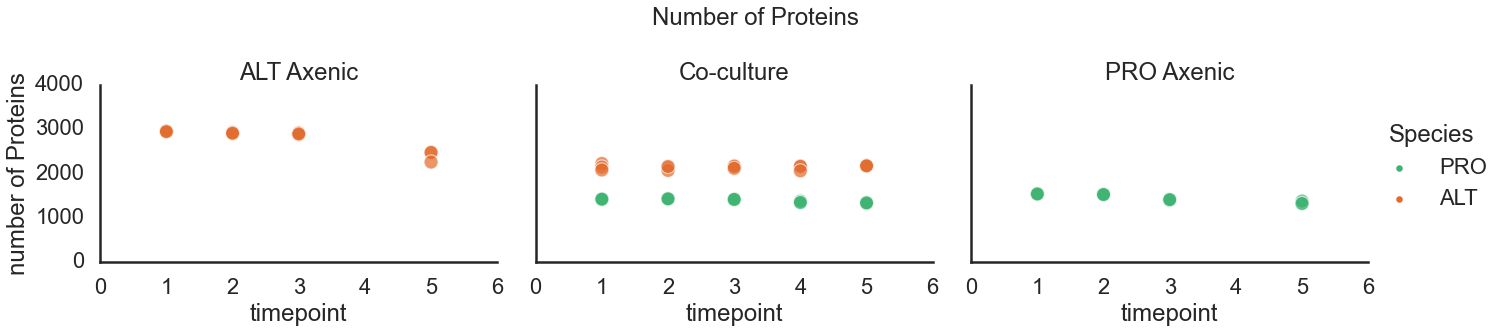

In [26]:
sns.relplot(data=size_df, 
            hue='Species', palette=gpal, hue_order=gorder,
            x='timepoint', y='count', 
            height=4, aspect=1.6, s=200, #style='Valid',
            alpha=0.7, col='culture',
           ).set_titles(col_template='{col_name}').set(ylabel='number of Proteins', yticks=[0,1000,2000,3000,4000])
plt.suptitle('Number of Proteins', y=1.1)           

In [27]:
psize_df = size_df.pivot_table(values='count', index=['culture','Sample', 'timepoint'], columns='Species').reset_index()
psize_df

Species,culture,Sample,timepoint,ALT,PRO
0,ALT Axenic,A1A,1,2948.0,NaN
1,ALT Axenic,A1B,1,2955.0,NaN
2,ALT Axenic,A1C,1,2937.0,NaN
3,ALT Axenic,A2A,2,2924.0,NaN
4,ALT Axenic,A2B,2,2894.0,NaN
5,ALT Axenic,A2C,2,2905.0,NaN
6,ALT Axenic,A3A,3,2912.0,NaN
7,ALT Axenic,A3B,3,2872.0,NaN
8,ALT Axenic,A3C,3,2889.0,NaN
9,ALT Axenic,A5A,5,2459.0,NaN


Text(0.5, 1.1, 'Number of Proteins')

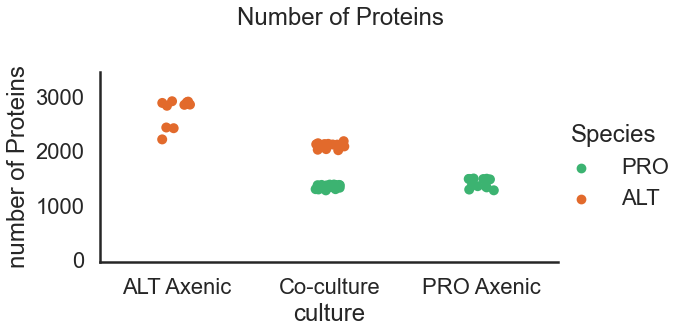

In [28]:
sns.catplot(data=size_df, 
            hue='Species', palette=gpal, hue_order=gorder,
            x='culture', 
            y='count', 
            height=4, aspect=2, s=10, #style='Valid',
            edgecolor='white',lw=1,
            #alpha=0.7, 
            #kind='box',
           ).set_titles(col_template='{col_name}').set(ylabel='number of Proteins', yticks=[0,1000,2000,3000])
plt.suptitle('Number of Proteins', y=1.1)           

Text(0.5, 1.1, 'Number of Proteins')

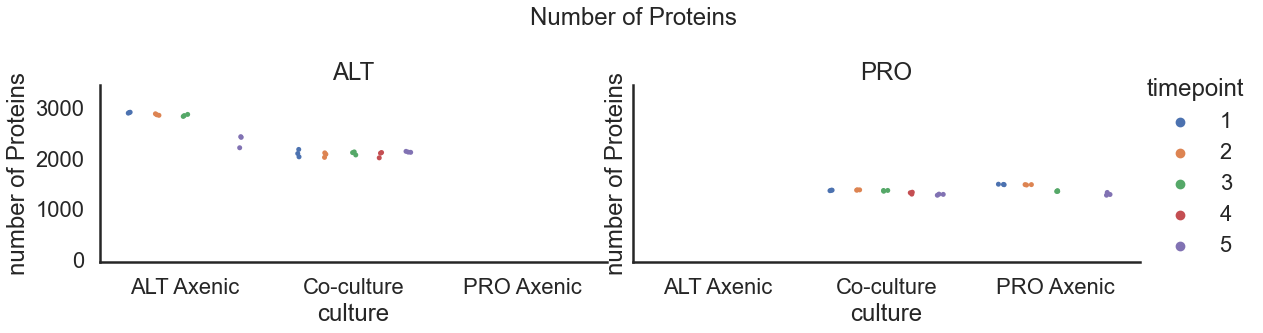

In [29]:
sns.catplot(data=size_df, 
            col='Species', hue='timepoint', # palette=gpal, hue_order=gorder,
            x='culture', 
            y='count', 
            height=4, aspect=2, #s=10, #style='Valid',
            edgecolor='white',lw=1, dodge=True,
            #alpha=0.7, 
            #kind='box',
           ).set_titles(col_template='{col_name}').set(ylabel='number of Proteins', yticks=[0,1000,2000,3000])
plt.suptitle('Number of Proteins', y=1.1)           

In [30]:
psize_df.culture.unique()

array(['ALT Axenic', 'Co-culture', 'PRO Axenic'], dtype=object)

Text(0.5, 1.1, 'number of proteins - current extraction')

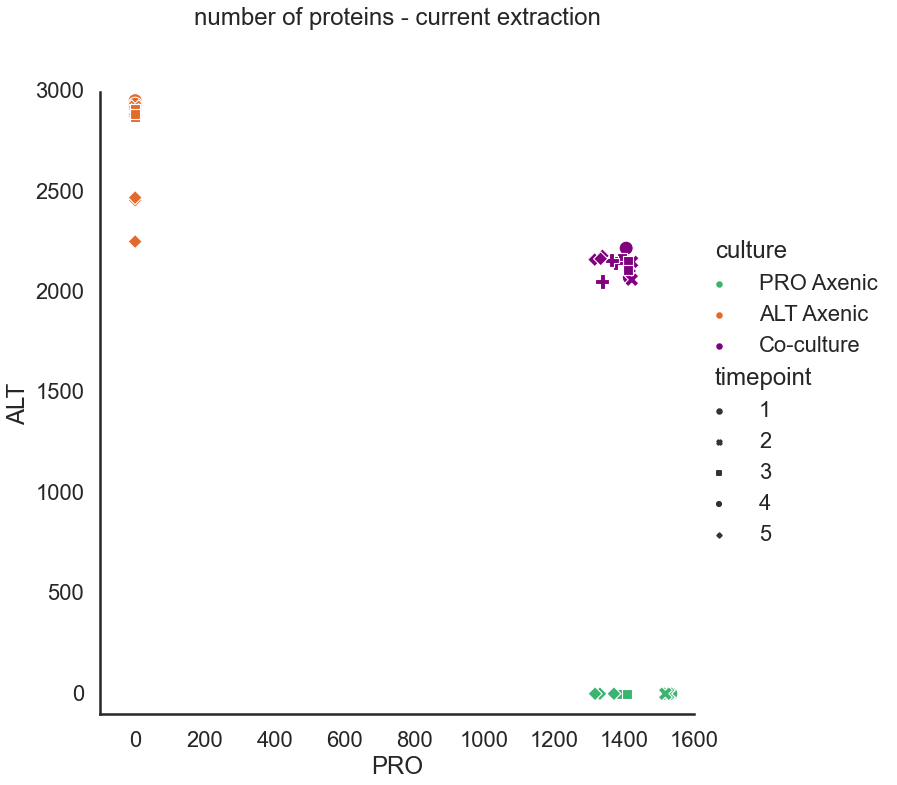

In [31]:
sns.set_context('poster')
sns.relplot(data=psize_df.fillna(0), 
                x='PRO', y='ALT', s=200, hue='culture', style='timepoint',
            height=10, hue_order=['PRO Axenic', 'ALT Axenic', 'Co-culture', ], palette=gpal+['purple'],
           ).set(xlim=(-100,1600), ylim=(-100,3000))
plt.title('number of proteins - current extraction', y=1.1)

In [32]:
tpal

['#aad5aa', 'MediumSeaGreen']

In [33]:
timepal = sns.color_palette("dark:#7978FF_r", n_colors=5).as_hex()
timepal = sns.color_palette("ocean_r", n_colors=5).as_hex()
#timepal = sns.color_palette("dark:Blue_r", n_colors=5).as_hex()

In [34]:
sns.color_palette("ocean", n_colors=5)


[(0.0, 0.2529411764705882, 0.16470588235294117),
 (0.0, 0.0, 0.3333333333333333),
 (0.0, 0.2529411764705882, 0.5019607843137255),
 (0.0, 0.5, 0.6666666666666666),
 (0.5058823529411764, 0.7529411764705882, 0.8352941176470589)]

Text(0.5, 1.1, 'number of proteins - co-culture')

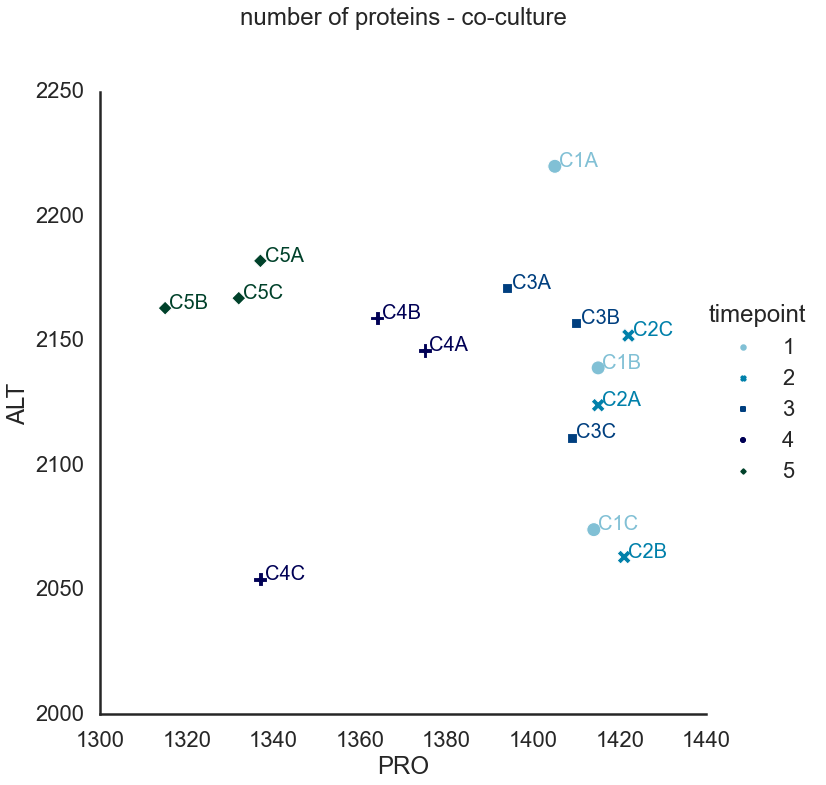

In [35]:
sns.set_context('poster')
tdf = psize_df.fillna(0).loc[psize_df.culture.isin(['Co-culture'])]
p1 = sns.relplot(data=tdf, 
                x='PRO', y='ALT', s=200, hue='timepoint', style='timepoint',
                 palette=timepal,
            height=10, 
            #hue_order=['ALT Axenic', 'PRO Axenic', 'Co-culture', ], palette=gpal+['purple'],
           )# .set(xlim=(-10,1600), ylim=(-10,3000))
for line in tdf.iterrows():
     line= line[1]
     #print(line)
     p1.ax.text(line['PRO']+1, line['ALT'], 
     line['Sample'], horizontalalignment='left', 
     size='small', color=timepal[line['timepoint']-1]), #weight='semibold')
plt.title('number of proteins - co-culture', y=1.1)

Text(0.5, 1.1, 'Intensity Histogram')

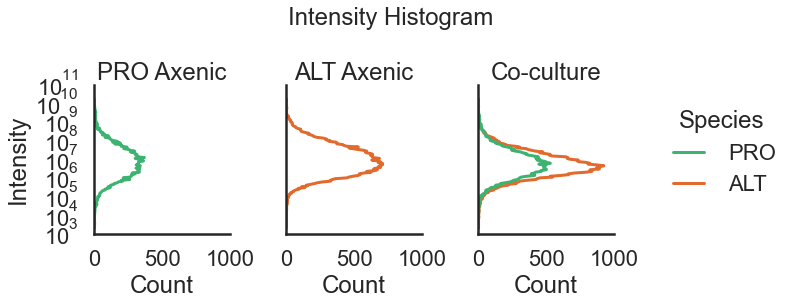

In [36]:
sns.set_context('poster')
sns.displot(data=mdf, y='Intensity', 
            #col='timepoint',  
            fill=False, element='poly',
            hue='Species', palette=gpal, hue_order=gorder,
            log_scale=True,
            height=4, aspect=0.8, 
            alpha=0.7, col='culture',
           ).set_titles(col_template='{col_name}').set(xticks=[0,500,1000])            
plt.suptitle('Intensity Histogram', y=1.1)           

Text(0.5, 1.1, 'Intensity Histogram')

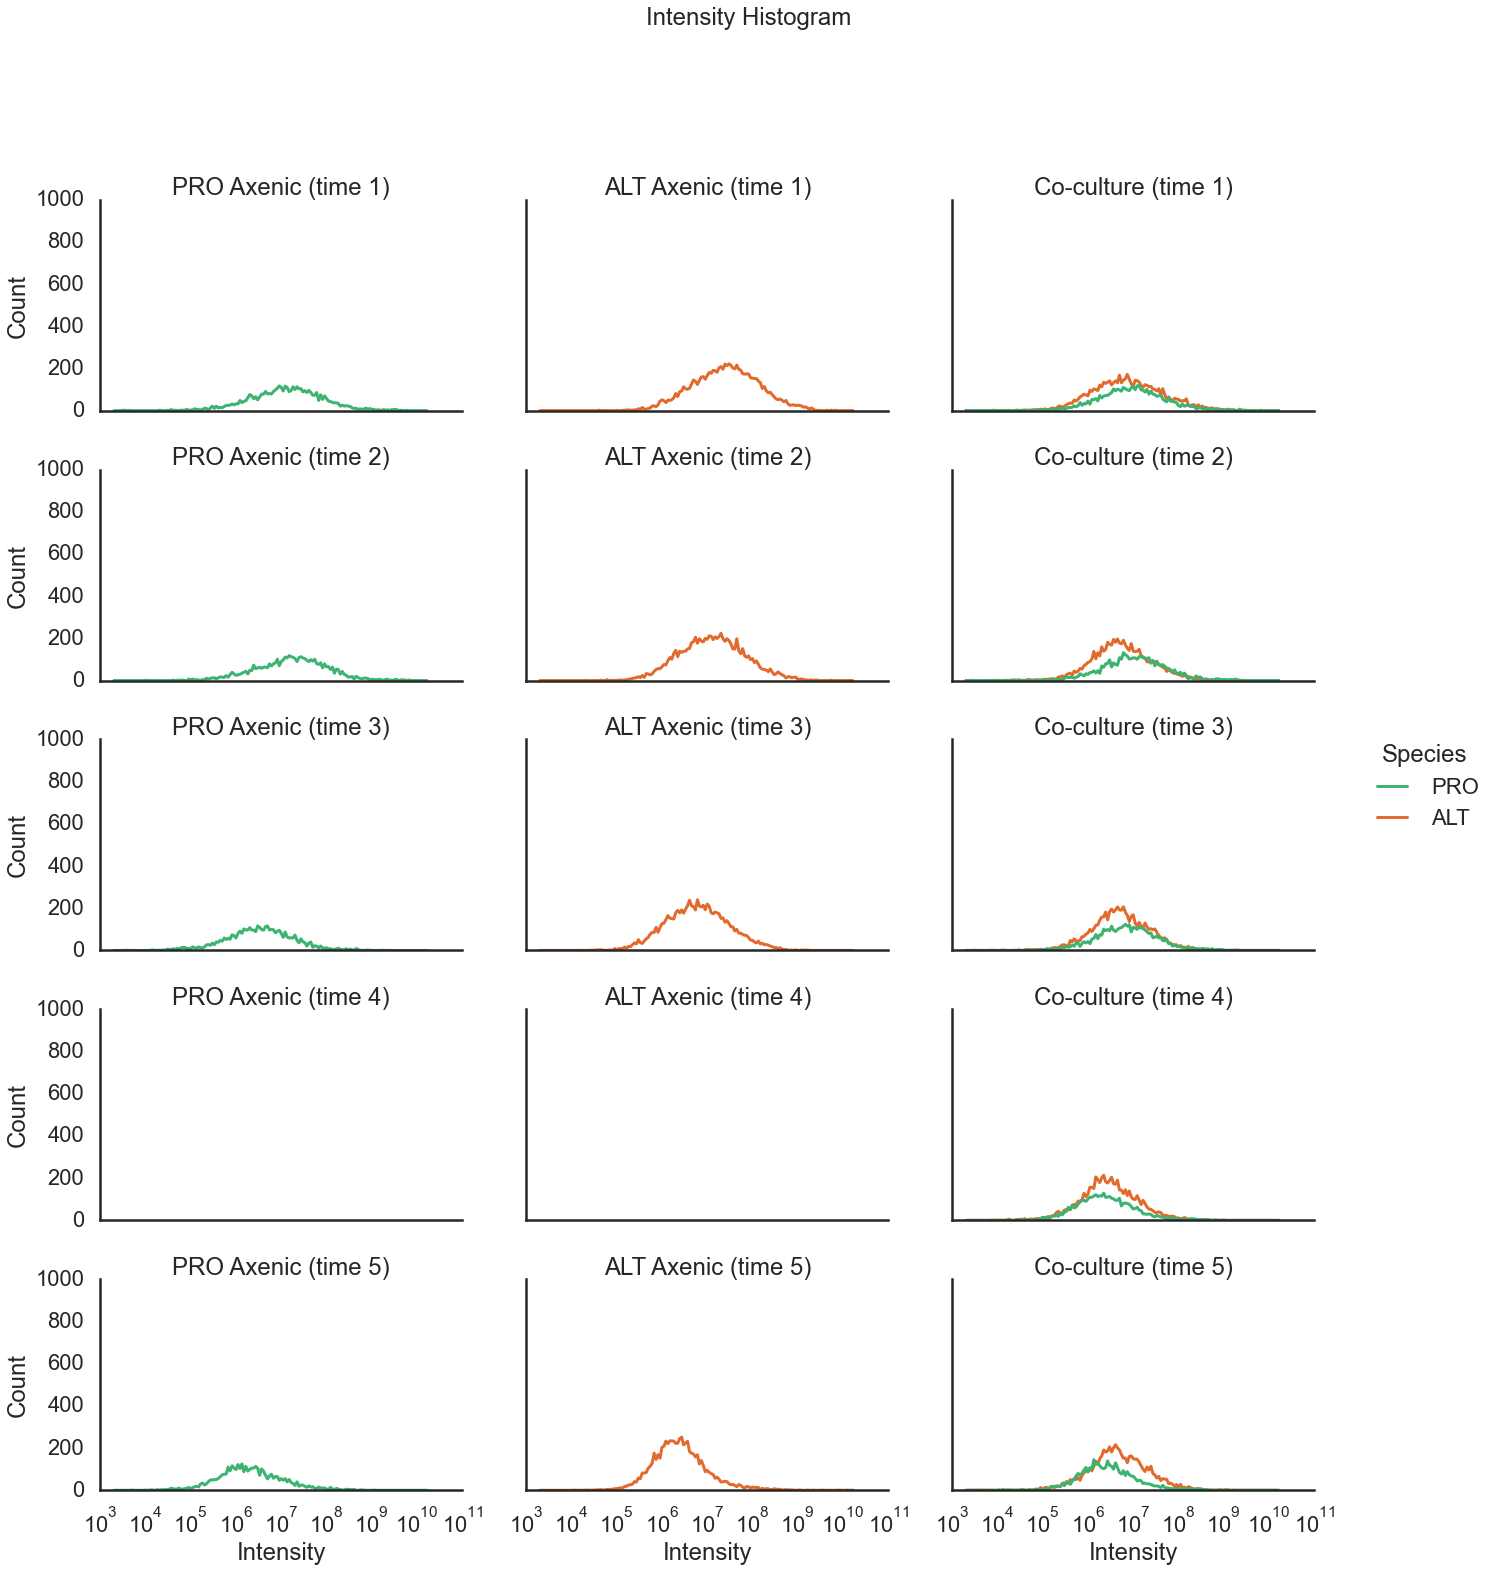

In [37]:
sns.displot(data=mdf, x='Intensity', 
            #col='timepoint',  
            fill=False, element='poly',
            hue='Species', palette=gpal, hue_order=gorder,
            log_scale=True,
            height=4, aspect=1.6, 
            alpha=0.7, col='culture',
            row='timepoint'
           ).set_titles(template='{col_name} (time {row_name})').set(yticks=[0,200,400,600,800,1000])            
plt.suptitle('Intensity Histogram', y=1.1)           

In [38]:
mdf.loc[mdf.ff.isin(['1A3 (AX PRO)'])]

,index,Protein Accession,Gene,Organism,Protein Full Name,Unique Peptides,Sequence Coverage,Protein Decoy/Contaminant/Target,Number of Peptides,Number of Unique Peptides,...,ecpath,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Length,organism


In [39]:
mdf.groupby(['Group', 'Species']).Intensity.describe()

count          mean           std           min  \
Group Species                                                      
A     ALT      33420.0  4.898847e+07  2.085119e+08  12810.856445   
C     ALT      32082.0  2.058817e+07  9.467856e+07   1912.990601   
      PRO      20765.0  2.851672e+07  1.245279e+08   5702.240234   
P     PRO      17357.0  4.835557e+07  2.454174e+08   3006.950195   

                        25%         50%         75%           max  
Group Species                                                      
A     ALT      2.399661e+06  8174047.25  31102953.0  1.732217e+10  
C     ALT      1.792510e+06  4602099.00  13467973.0  6.562808e+09  
      PRO      1.708456e+06  5152180.00  16136442.0  4.085199e+09  
P     PRO      1.663915e+06  6415959.50  24824482.0  6.767466e+09

In [40]:
mdf.head()

,index,Protein Accession,Gene,Organism,Protein Full Name,Unique Peptides,Sequence Coverage,Protein Decoy/Contaminant/Target,Number of Peptides,Number of Unique Peptides,...,ecpath,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Length,organism
0,0,WP_011133152.1 photosystem I core protein PsaA...,NaN,NaN,NaN,EILDSQQGDPILFPAPK|AISEVFNGSLVEVGGK|AISEVFN[Com...,mTISPPESGEKDKKILESPVKADPRPIDFAKLDKPGFWSSKlskgp...,T,105,105,...,K02689 psaA; photosystem I P700 chlorophyll a...,139144.635322,-0.554017,0.316796,-0.170511,8.646086e-01,1.000000,treatment_long.term_vs_ref,2301.0,MED4
1,1,WP_011132825.1 polyribonucleotide nucleotidylt...,NaN,NaN,NaN,IDIEDGGIVTIASHDGAAAEEAQK|DLELDKIELEVQTK|VGLIGD...,megkNTSITFDGREIRLTTGLYAPQAGGAVMIECGDTSLLVTATKt...,T,222,222,...,"K00962 pnp, PNPT1; polyribonucleotide nucleot...",8669.272255,-0.285484,0.141085,-0.000000,1.000000e+00,1.000000,treatment_long.term_vs_ref,2163.0,MED4
2,2,WP_011132757.1 autotransporter outer membrane ...,NaN,NaN,NaN,AGVAYGVGSSNLNNYNFSSTTASLSSTNTHYSIYGVK|GM[Commo...,mkiynfllltlifsslpikagenfsgnfdvnnwstvgssgdgsldt...,T,17,17,...,NaN,629.711653,0.815069,0.154294,2.042007,4.115081e-02,0.160957,treatment_long.term_vs_ref,1473.0,MED4
3,3,WP_011132404.1 NADP-dependent phosphogluconate...,NaN,NaN,NaN,AGAATDAVIDNISEYLEEGDLLIDGGNSQFKDTER|AGAATDAVID...,mpkAHFGLIGLGVMGENLVLNAERNGFSSVVFNRTYSKTQEFLEGR...,T,56,56,...,"K00033 PGD, gnd, gntZ; 6-phosphogluconate deh...",908.289573,0.064183,0.171223,0.000000,1.000000e+00,1.000000,treatment_long.term_vs_ref,1416.0,MED4
4,4,WP_011132401.1 class II fructose-bisphosphatas...,NaN,NaN,NaN,ALGGHFQGQLVYDPAIAQTSEWADYTK|LTGLGQKDEADAAAVEAM...,MNQTLIQEILEVVEQAAIASAKLTGLGQKDEADAAAVEAMRLRmgk...,T,99,99,...,"K11532 glpX-SEBP; fructose-1,6-bisphosphatase...",3505.138037,-1.427004,0.183072,-5.063600,4.114134e-07,0.000006,treatment_long.term_vs_ref,999.0,MED4


In [41]:
d = deseq_df.drop_duplicates('protein_id')
smap = d['sub']
smap.index = d['protein_id']

In [42]:
mdf['protein_id'] = mdf['Protein Accession'].str.split(expand=True)[0]
mdf['protein_group'] = mdf['protein_id'].map(smap)

mdf.loc[mdf['protein_group'].str.contains('Poorly characterized', na=False), 'Category'] = 'Poorly characterized'
mdf.loc[mdf['protein_group'].str.contains('metabolism', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('genetic information', na=False), 'Category'] = 'genetic info'
mdf.loc[mdf['protein_group'].str.contains('Signal transduction', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('signaling and cellular processes', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('Energy metabolism', na=False), 'Category'] = 'Energy'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of terpenoids and polyketides', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('cofactors and vitamins', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('Nucleotide metabolism', na=False), 'Category'] = 'Nucleotide'
mdf.loc[mdf['protein_group'].str.contains('Carbohydrate metabolism', na=False), 'Category'] = 'Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Lipid metabolism', na=False), 'Category'] = 'Lipid'
mdf.loc[mdf['protein_group'].str.contains('Glycan biosynthesis and metabolism', na=False), 'Category'] = 'Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Amino acid metabolism', na=False), 'Category'] = 'Amino acid'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of other amino acids', na=False), 'Category'] = 'Amino acid'



In [43]:
mdf['Category'] = np.NaN

In [44]:
mdf['protein_id'] = mdf['Protein Accession'].str.split(expand=True)[0]
mdf['protein_group'] = mdf['protein_id'].map(smap)

#mdf.loc[mdf['protein_group'].str.contains('Poorly characterized', na=False), 'Category'] = 'Poorly characterized'
mdf.loc[mdf['protein_group'].str.contains('metabolism', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('genetic information', na=False), 'Category'] = 'genetic info'
mdf.loc[mdf['protein_group'].str.contains('Signal transduction', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('signaling and cellular processes', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('Energy metabolism', na=False), 'Category'] = 'Energy & Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of terpenoids and polyketides', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('cofactors and vitamins', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('Nucleotide metabolism', na=False), 'Category'] = 'Amino acid & Nucleotide & Lipid'
mdf.loc[mdf['protein_group'].str.contains('Carbohydrate metabolism', na=False), 'Category'] = 'Energy & Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Lipid metabolism', na=False), 'Category'] = 'Amino acid & Nucleotide & Lipid'
mdf.loc[mdf['protein_group'].str.contains('Glycan biosynthesis and metabolism', na=False), 'Category'] = 'Energy & Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Amino acid metabolism', na=False), 'Category'] = 'Amino acid & Nucleotide & Lipid'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of other amino acids', na=False), 'Category'] = 'Amino acid & Nucleotide & Lipid'



In [45]:
plut_map = {'P': PCOLOR_light, 'C' :PRO_COLOR}
alut_map = {'A': HCOLOR_light, 'C' :HCOLOR}


C:\Users\Osnat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1, 'MED4 proteins (log2(Intensity))')

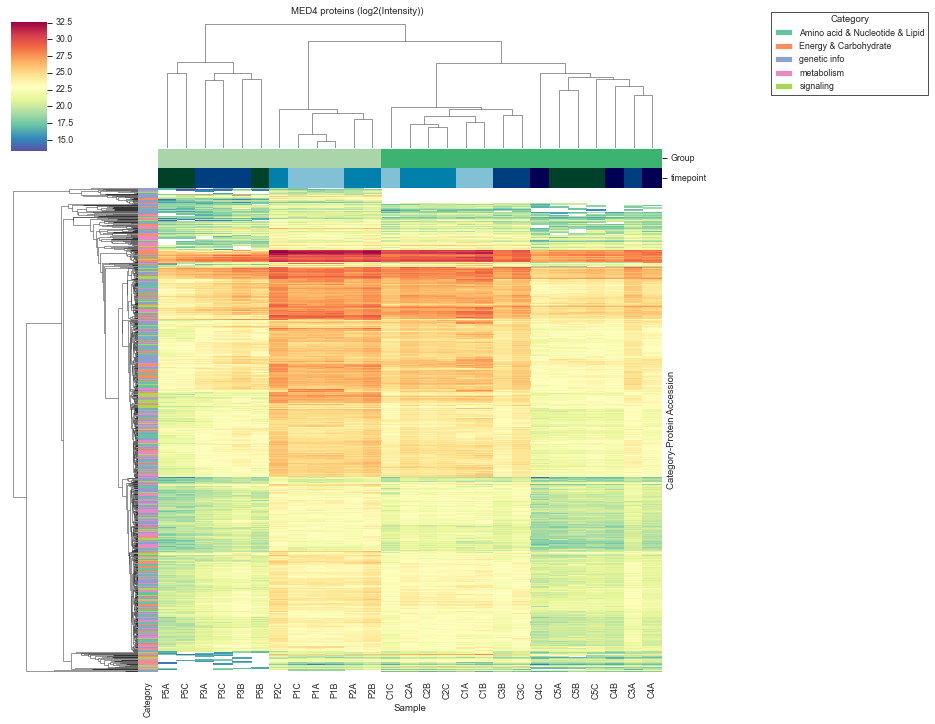

In [46]:
from matplotlib.patches import Patch
sns.set_context('paper')
pdf = mdf.loc[mdf.Species.isin(['PRO'])].pivot_table(values='log2Intensity', fill_value=0, 
                                                     index=['Category','Protein Accession'], columns='Sample' )
col_anno = pd.DataFrame(pdf.columns.to_list())
col_anno.index= col_anno[0]
col_anno['Group']=col_anno[0].str.get(0)
col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
cols=['Group', 'timepoint']
col_anno['Group'] = col_anno['Group'].map(plut_map)
col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], timepal)))

glut = dict(zip(pdf.index.get_level_values(0).unique(), sns.color_palette('Set2')))
row_anno = pdf.index.get_level_values(0).to_series().reset_index(drop=True).map(glut)
row_anno.index = pdf.index

sns.clustermap(pdf, yticklabels=False, cmap='Spectral_r', mask=(pdf==0), 
               col_colors=col_anno[cols],
               row_colors=row_anno,
               #row_cluster=False,
              #               colors_ratio=1,
              )
handles = [Patch(facecolor=glut[name]) for name in glut]
plt.legend(handles, glut, title='Category',
           bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.suptitle('MED4 proteins (log2(Intensity))', y=1)

C:\Users\Osnat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1, 'MED4 proteins (log2(Intensity))')

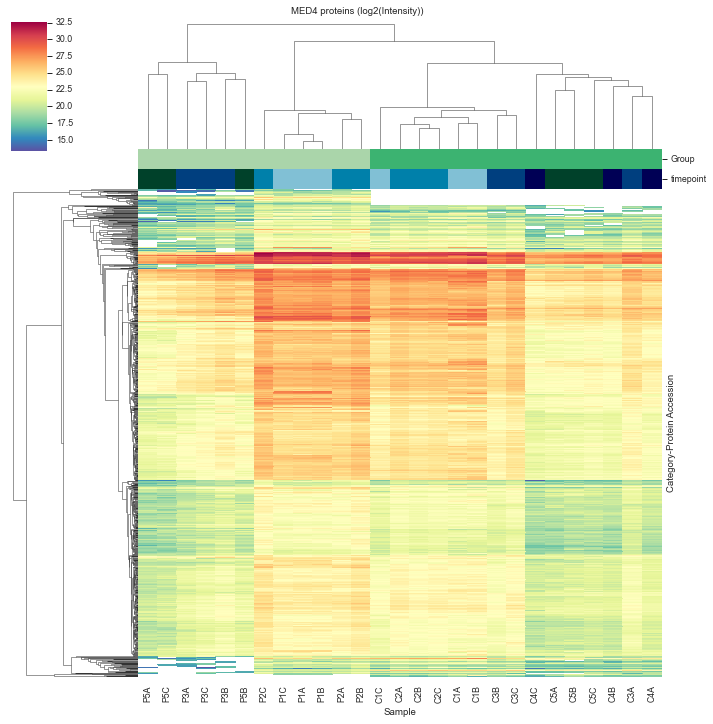

In [47]:
from matplotlib.patches import Patch
sns.set_context('paper')
pdf = mdf.loc[mdf.Species.isin(['PRO'])].pivot_table(values='log2Intensity', fill_value=0, 
                                                     index=['Category','Protein Accession'], columns='Sample' )
col_anno = pd.DataFrame(pdf.columns.to_list())
col_anno.index= col_anno[0]
col_anno['Group']=col_anno[0].str.get(0)
col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
cols=['Group', 'timepoint']
col_anno['Group'] = col_anno['Group'].map(plut_map)
col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], timepal)))


sns.clustermap(pdf, yticklabels=False, cmap='Spectral_r', mask=(pdf==0), 
               col_colors=col_anno[cols],
              )
# handles = [Patch(facecolor=plut_map[name]) for name in plut_map]
# plt.legend(handles, plut_map, title='Group',
#            bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.suptitle('MED4 proteins (log2(Intensity))', y=1)

C:\Users\Osnat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1, 'MED4 proteins (log2(Intensity))')

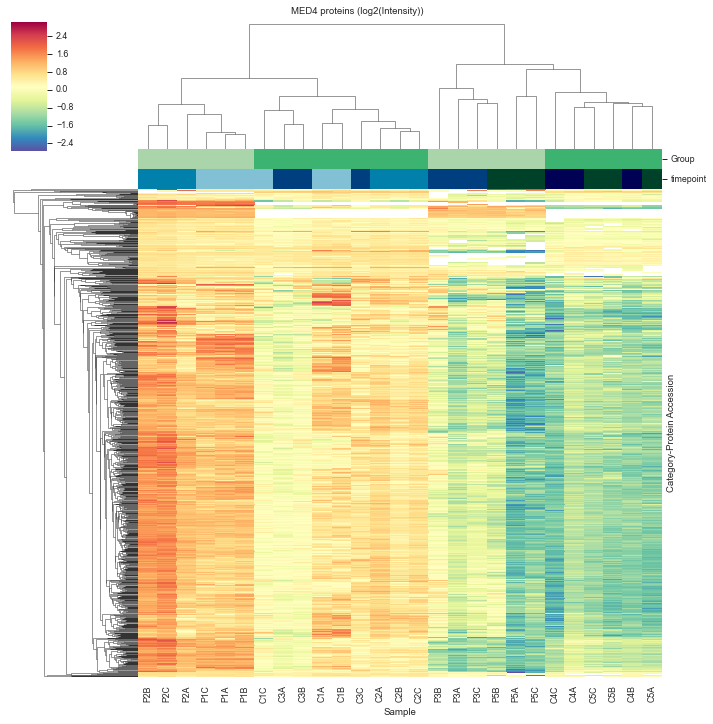

In [48]:
from matplotlib.patches import Patch
sns.set_context('paper')
pdf = mdf.loc[mdf.Species.isin(['PRO'])].pivot_table(values='log2Intensity', fill_value=0, 
                                                     index=['Category','Protein Accession'], columns='Sample' )
col_anno = pd.DataFrame(pdf.columns.to_list())
col_anno.index= col_anno[0]
col_anno['Group']=col_anno[0].str.get(0)
col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
cols=['Group', 'timepoint']
col_anno['Group'] = col_anno['Group'].map(plut_map)
col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], timepal)))


sns.clustermap(pdf, yticklabels=False, cmap='Spectral_r', mask=(pdf==0), 
               col_colors=col_anno[cols], 
               z_score =0,
              )
# handles = [Patch(facecolor=plut_map[name]) for name in plut_map]
# plt.legend(handles, plut_map, title='Group',
#            bbox_to_anchor=(1.3, 1), bbox_transform=plt.gcf().transFigure, loc='upper right')

plt.suptitle('MED4 proteins (log2(Intensity))', y=1)

In [49]:
mdf['protein_id'] = mdf['Protein Accession'].str.split(expand=True)[0]
mdf['protein_group'] = mdf['protein_id'].map(smap)

mdf.loc[mdf['protein_group'].str.contains('Poorly characterized', na=False), 'Category'] = 'Poorly characterized'
mdf.loc[mdf['protein_group'].str.contains('metabolism', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('genetic information', na=False), 'Category'] = 'genetic info'
mdf.loc[mdf['protein_group'].str.contains('Signal transduction', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('signaling and cellular processes', na=False), 'Category'] = 'signaling'
mdf.loc[mdf['protein_group'].str.contains('Energy metabolism', na=False), 'Category'] = 'Energy'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of terpenoids and polyketides', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('cofactors and vitamins', na=False), 'Category'] = 'metabolism'
mdf.loc[mdf['protein_group'].str.contains('Nucleotide metabolism', na=False), 'Category'] = 'Nucleotide'
mdf.loc[mdf['protein_group'].str.contains('Carbohydrate metabolism', na=False), 'Category'] = 'Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Lipid metabolism', na=False), 'Category'] = 'Lipid'
mdf.loc[mdf['protein_group'].str.contains('Glycan biosynthesis and metabolism', na=False), 'Category'] = 'Carbohydrate'
mdf.loc[mdf['protein_group'].str.contains('Amino acid metabolism', na=False), 'Category'] = 'Amino acid'
mdf.loc[mdf['protein_group'].str.contains('Metabolism of other amino acids', na=False), 'Category'] = 'Amino acid'



In [50]:
pdf.index.get_level_values(0).to_series().reset_index(drop=True).map(glut)

0          (0.4, 0.7607843137254902, 0.6470588235294118)
1          (0.4, 0.7607843137254902, 0.6470588235294118)
2          (0.4, 0.7607843137254902, 0.6470588235294118)
3          (0.4, 0.7607843137254902, 0.6470588235294118)
4          (0.4, 0.7607843137254902, 0.6470588235294118)
                             ...                        
918    (0.6509803921568628, 0.8470588235294118, 0.329...
919    (0.6509803921568628, 0.8470588235294118, 0.329...
920    (0.6509803921568628, 0.8470588235294118, 0.329...
921    (0.6509803921568628, 0.8470588235294118, 0.329...
922    (0.6509803921568628, 0.8470588235294118, 0.329...
Name: Category, Length: 923, dtype: object

In [51]:
col_anno = pd.DataFrame(pdf.columns.to_series())
col_anno.columns
# col_anno.index= col_anno
# col_anno['Group']=col_anno[0].str.get(0)
# col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
# plut_map = {'P': PCOLOR_light, 'C' :PRO_COLOR}
# alut_map = {'A': HCOLOR_light, 'C' :HCOLOR}
# cols=['Group', 'timepoint']
# col_anno['Group'] = col_anno['Group'].map(plut_map)
# col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], sns.color_palette("dark:salmon_r", n_colors=5).as_hex())))
# col_anno


Index(['Sample'], dtype='object')

In [52]:
col_anno = pd.DataFrame(pdf.columns.to_series())
col_anno.columns
# col_anno.index= col_anno
# col_anno['Group']=col_anno[0].str.get(0)
# col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
# plut_map = {'P': PCOLOR_light, 'C' :PRO_COLOR}
# alut_map = {'A': HCOLOR_light, 'C' :HCOLOR}
# cols=['Group', 'timepoint']
# col_anno['Group'] = col_anno['Group'].map(plut_map)
# col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], sns.color_palette("dark:salmon_r", n_colors=5).as_hex())))
# col_anno


Index(['Sample'], dtype='object')

C:\Users\Osnat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1, 'HOT1A3 proteins (log2(Intensity))')

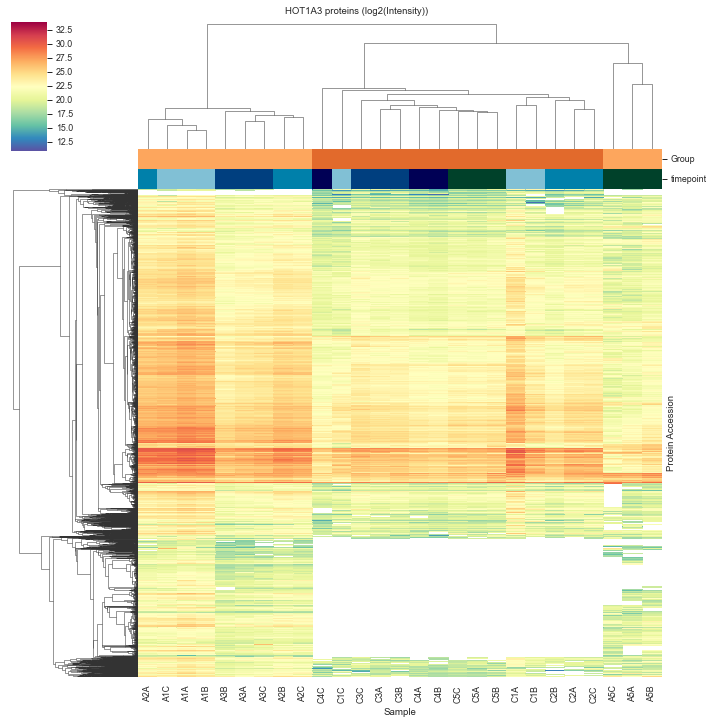

In [53]:
sns.set_context('paper')

adf = mdf.loc[mdf.Species.isin(['ALT'])].pivot_table(values='log2Intensity', fill_value=0, index='Protein Accession', columns='Sample' )

col_anno = pd.DataFrame(adf.columns.to_list())
col_anno.index= col_anno[0]
col_anno['Group']=col_anno[0].str.get(0)
col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
cols=['Group', 'timepoint']
col_anno['Group'] = col_anno['Group'].map(alut_map)
col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], timepal)))


sns.clustermap(adf, yticklabels=False, cmap='Spectral_r', mask=(adf==0),
               col_colors=col_anno[cols],
              )
plt.suptitle('HOT1A3 proteins (log2(Intensity))', y=1)

C:\Users\Osnat\Anaconda3\lib\site-packages\seaborn\matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


Text(0.5, 1, 'HOT1A3 proteins (log2(Intensity))')

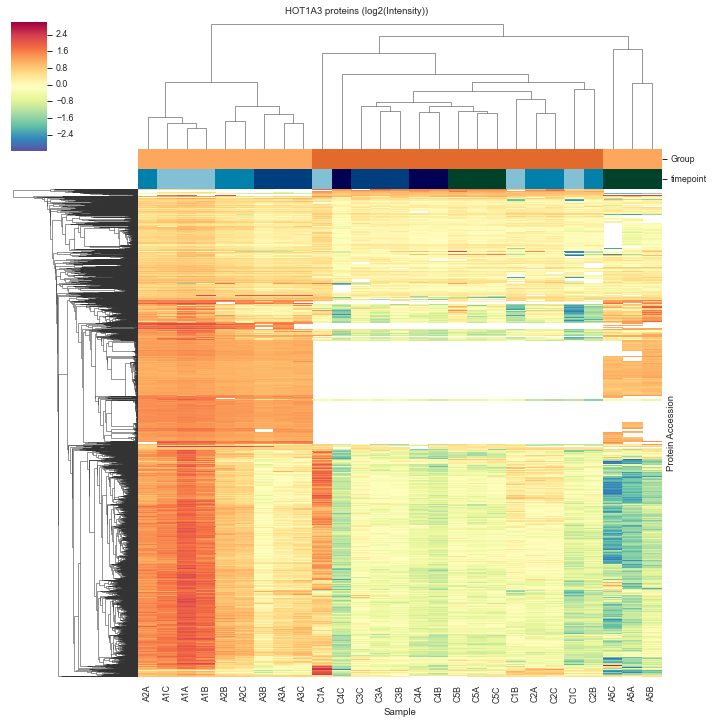

In [54]:
sns.set_context('paper')

adf = mdf.loc[mdf.Species.isin(['ALT'])].pivot_table(values='log2Intensity', fill_value=0, index='Protein Accession', columns='Sample' )

col_anno = pd.DataFrame(adf.columns.to_list())
col_anno.index= col_anno[0]
col_anno['Group']=col_anno[0].str.get(0)
col_anno['timepoint']=pd.to_numeric(col_anno[0].str.get(1))
cols=['Group', 'timepoint']
col_anno['Group'] = col_anno['Group'].map(alut_map)
col_anno['timepoint'] = col_anno['timepoint'].map(dict(zip([1,2,3,4,5], timepal)))


sns.clustermap(adf, yticklabels=False, cmap='Spectral_r', mask=(adf==0),
               col_colors=col_anno[cols],
               z_score =0,
              )
plt.suptitle('HOT1A3 proteins (log2(Intensity))', y=1)

In [55]:
deseq_df.head()

,gene_id,gene,product,status,main,sub,path,ecpath,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,Length,organism,protein_id
0,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,no_significant,09130 Environmental Information Processing // ...,09132 Signal transduction // 09143 Cell growth...,02020 Two-component system [PATH:ko02020] // 0...,K02313 dnaA; chromosomal replication initiato...,4746.947812,-0.490383,0.200709,-0.0,1.0,1.0,treatment_long.term_vs_ref,1653,HOT1A3,WP_232375975.1
1,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03030 DNA replication [PATH:ko03030] // 03430 ...,K02338 dnaN; DNA polymerase III subunit beta ...,1970.934654,-0.417438,0.147356,-0.0,1.0,1.0,treatment_long.term_vs_ref,1098,HOT1A3,WP_012516526.1
2,ACZ81_RS00015,recF,DNA replication/repair protein RecF,no_significant,09120 Genetic Information Processing // 09180 ...,09124 Replication and repair // 09182 Protein ...,03440 Homologous recombination [PATH:ko03440] ...,K03629 recF; DNA replication and repair prote...,536.431698,-0.026811,0.189910,-0.0,1.0,1.0,treatment_long.term_vs_ref,1086,HOT1A3,WP_061438857.1
3,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,no_significant,09180 Brite Hierarchies,09182 Protein families: genetic information pr...,03032 DNA replication proteins [BR:ko03032] //...,K02470 gyrB; DNA gyrase subunit B [EC:5.6.2.2],2930.112545,-0.352258,0.225698,-0.0,1.0,1.0,treatment_long.term_vs_ref,2418,HOT1A3,WP_014977848.1
4,ACZ81_RS00025,ACZ81_RS00025,hypothetical protein,no_significant,NaN,NaN,NaN,NaN,150.213907,-0.067328,0.182578,-0.0,1.0,1.0,treatment_long.term_vs_ref,441,HOT1A3,WP_039234509.1


In [56]:
def run_pca(X, metadf, sample_col='experiment_sample', n_components=2):
    scaledX = StandardScaler().fit_transform(X)
    principalComponents = pca.fit_transform(scaledX)
    print('Variance percent explained\n', pca.explained_variance_ratio_)
    pca_columns = [f'PCA{i}' for i in range(1,n_components+1)]
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = pca_columns)
    principalDf.set_index(X.index, inplace=True)
    dfpca = pd.merge(left=principalDf, left_index=True, right=metadf, right_on=sample_col)
    return dfpca


In [57]:
adf = mdf.loc[mdf.Species.isin(['ALT'])].pivot_table(values='log2Intensity', fill_value=1, index='Protein Accession', columns='Sample' )


In [58]:
adf.columns

Index(['A1A', 'A1B', 'A1C', 'A2A', 'A2B', 'A2C', 'A3A', 'A3B', 'A3C', 'A5A',
       'A5B', 'A5C', 'C1A', 'C1B', 'C1C', 'C2A', 'C2B', 'C2C', 'C3A', 'C3B',
       'C3C', 'C4A', 'C4B', 'C4C', 'C5A', 'C5B', 'C5C'],
      dtype='object', name='Sample')

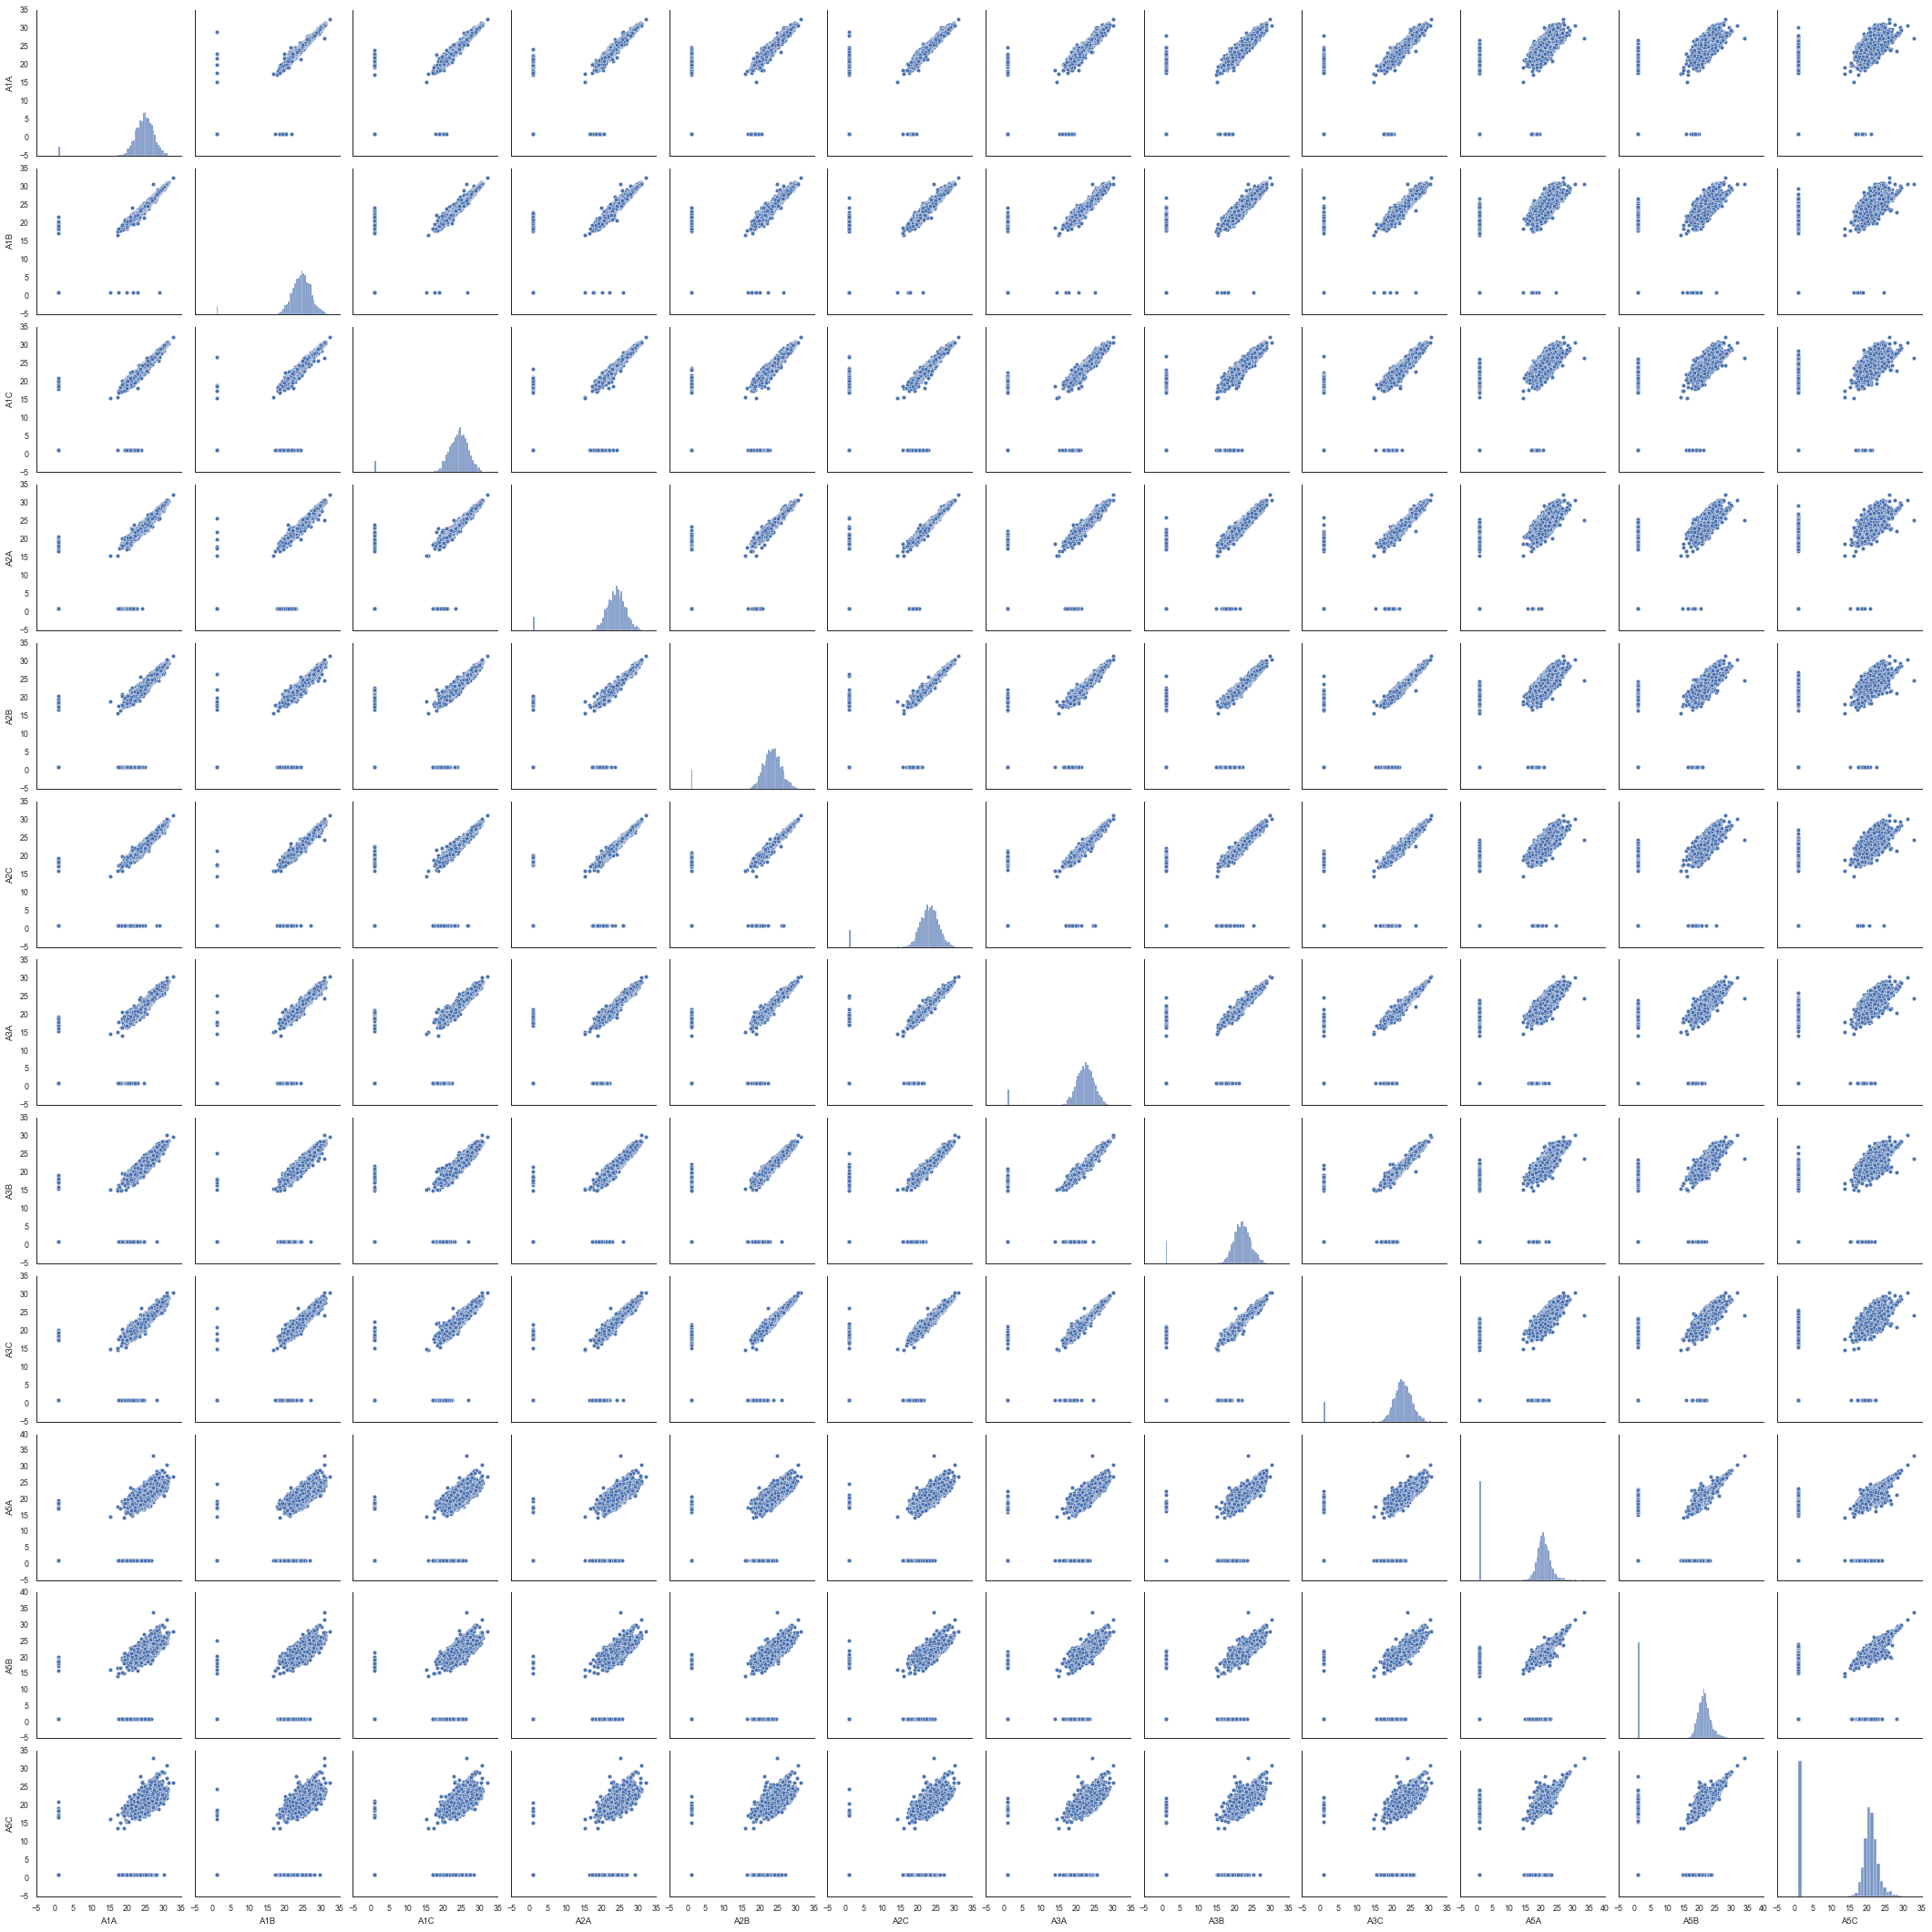

In [59]:
acols = ['A1A', 'A1B', 'A1C', 'A2A', 'A2B', 'A2C', 'A3A', 'A3B', 'A3C', 'A5A',
       'A5B', 'A5C']
ccols = ['C1A', 'C1B', 'C1C', 'C2A', 'C2B', 'C2C', 'C3A', 'C3B',
       'C3C', 'C4A', 'C4B', 'C4C', 'C5A', 'C5B', 'C5C']
sns.pairplot(adf, vars=acols)

In [60]:
adf = mdf.loc[mdf.Species.isin(['ALT'])].pivot_table(values='log2Intensity', fill_value=1, index='Protein Accession', columns='Sample' )
n_components = 2
pca = PCA(n_components=2)
X = adf.T
scaledX = StandardScaler().fit_transform(X)
principalComponents = pca.fit_transform(scaledX)
print('Variance percent explained\n', pca.explained_variance_ratio_)
pca_columns = [f'PCA{i} ({pca.explained_variance_ratio_[i-1]:.0%})' for i in range(1,n_components+1)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = pca_columns)
principalDf.set_index(X.index, inplace=True)
principalDf['Group']=principalDf.index.str.get(0)
principalDf['timepoint']=pd.to_numeric(principalDf.index.str.get(1))


Variance percent explained
 [0.59813521 0.17158431]


Text(0.5, 1.0, 'PCA of ALT (HOT1A3) proteins')

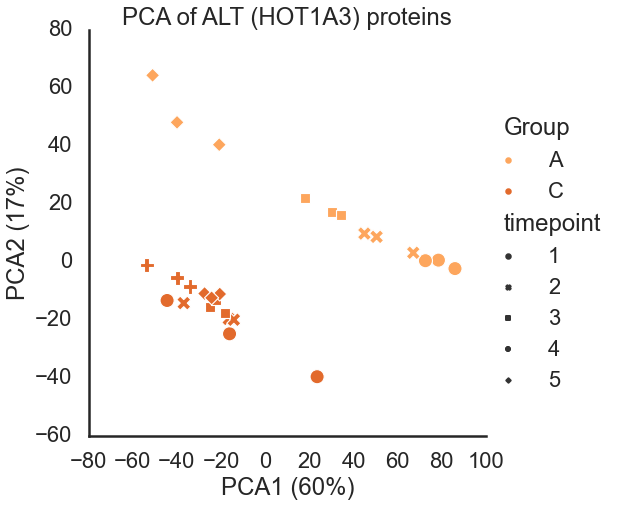

In [61]:
sns.set_context('poster')
xcol = [i for i in principalDf.columns if i.startswith('PCA1')][0]
ycol = [i for i in principalDf.columns if i.startswith('PCA2')][0]
sns.relplot(
    data=principalDf, x=xcol, y=ycol, hue='Group', style='timepoint', s=200,
    hue_order=['A', 'C'], palette=[HCOLOR_light, HCOLOR],
    height=7,
           )
plt.title('PCA of ALT (HOT1A3) proteins')

In [62]:
pdf = mdf.loc[mdf.Species.isin(['PRO'])].pivot_table(values='log2Intensity', fill_value=1, 
                                                     index='Protein Accession', columns='Sample' )
n_components = 2
pca = PCA(n_components=2)
X = pdf.T
scaledX = StandardScaler().fit_transform(X)

principalComponents = pca.fit_transform(scaledX)
print('Variance percent explained\n', pca.explained_variance_ratio_)
pca_columns = [f'PCA{i} ({pca.explained_variance_ratio_[i-1]:.0%})' for i in range(1,n_components+1)]
principalDf = pd.DataFrame(data = principalComponents
             , columns = pca_columns)
principalDf.set_index(X.index, inplace=True)
principalDf['Group']=principalDf.index.str.get(0)
principalDf['timepoint']=pd.to_numeric(principalDf.index.str.get(1))


Variance percent explained
 [0.67921749 0.10662381]


Text(0.5, 1.0, 'PCA of PRO (MED4) proteins')

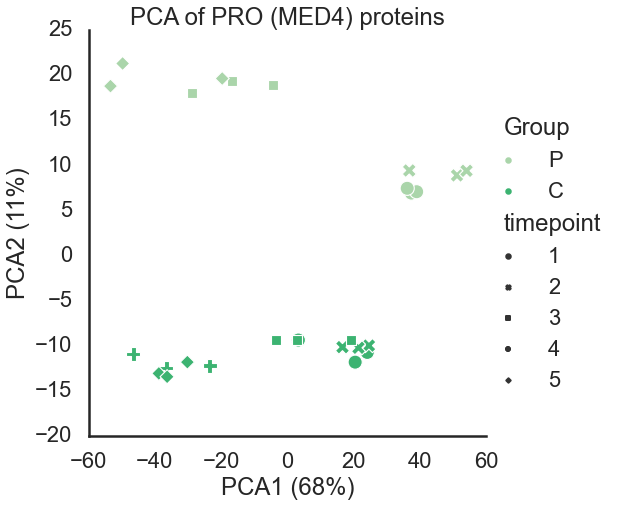

In [63]:
sns.set_context('poster')
xcol = [i for i in principalDf.columns if i.startswith('PCA1')][0]
ycol = [i for i in principalDf.columns if i.startswith('PCA2')][0]
sns.relplot(
    data=principalDf, x=xcol, y=ycol, hue='Group', style='timepoint', s=200,
    hue_order=['P', 'C'], palette=[PCOLOR_light, PRO_COLOR],
    height=7,
           )
plt.title('PCA of PRO (MED4) proteins')

<AxesSubplot:xlabel='Sample', ylabel='Sample'>

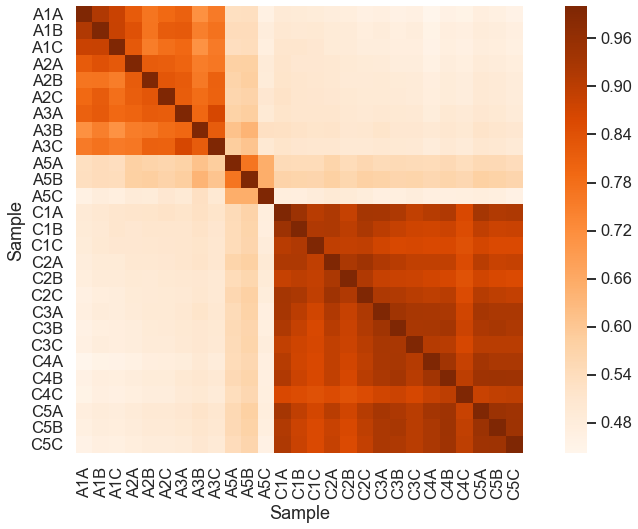

In [64]:
# corr = adf.corr()
# corr.style.background_gradient(cmap='coolwarm')

sns.set_context('talk')
corr = adf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True,
            vmax=1,
            cmap='Oranges',
           )


<AxesSubplot:xlabel='Sample', ylabel='Sample'>

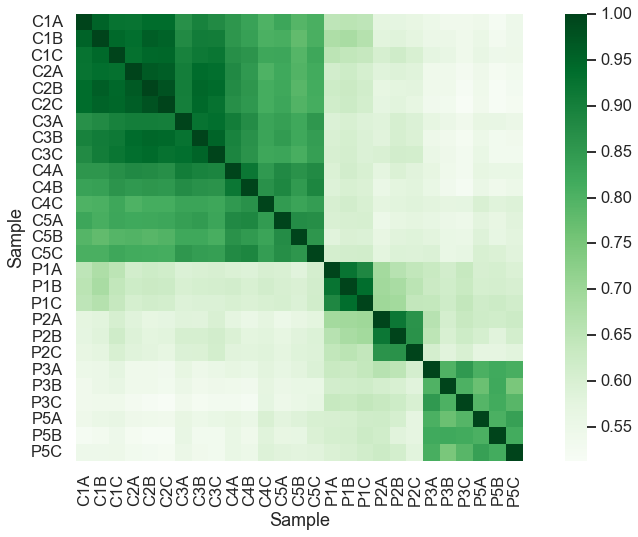

In [65]:
# corr = adf.corr()
# corr.style.background_gradient(cmap='coolwarm')

sns.set_context('talk')
corr = pdf.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            square=True,
            vmax=1,
            cmap='Greens'
           )
